# Income data

## Import libraries

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

Show numbers without scientific notation

## Import aggregated household income data

In [302]:
income = pd.read_csv('income.csv')
income

,_id,Neighborhood,Id,estimate__aggregate_household_income_in_the_past_12_months__,margin_of_error__aggregate_household_income_in_the_past_12_m
0,1,Allegheny Center,1,28265700,8176700
1,2,Allegheny West,2,23755400,15159354
2,3,Allentown,3,40566300,8358735.28
3,4,Arlington,4,33111400,6248592.971
4,5,Arlington Heights,5,2515000,1056475
...,...,...,...,...,...
86,87,Upper Lawrenceville,87,60604600,14808774.52
87,88,West End,88,4884400,2447655
88,89,West Oakland,89,15820400,3620802.954
89,90,Westwood,90,90594300,11234701.15


## Parse data

We rename the columns, select only the relevant data, remove unnecessary rows, and convert string-based columns to numeric format for future computations.

In [308]:
income = income.rename(columns={
    'estimate__aggregate_household_income_in_the_past_12_months__': 'Total_income',
    'margin_of_error__aggregate_household_income_in_the_past_12_m': 'Margin_of_error'
})
income = income[['Neighborhood', 'Total_income', 'Margin_of_error']]
income = income[income['Total_income'] != '-']
income['Total_income'] = pd.to_numeric(income['Total_income'])
income['Margin_of_error'] = pd.to_numeric(income['Margin_of_error'])
income

,Neighborhood,Total_income,Margin_of_error
0,Allegheny Center,28265700,8176700.00
1,Allegheny West,23755400,15159354.00
2,Allentown,40566300,8358735.28
3,Arlington,33111400,6248592.97
4,Arlington Heights,2515000,1056475.00
...,...,...,...
86,Upper Lawrenceville,60604600,14808774.52
87,West End,4884400,2447655.00
88,West Oakland,15820400,3620802.95
89,Westwood,90594300,11234701.15


Note that two neighborhoods are removed because they contain invalid data.

## Import individual's income data

In [278]:
individuals = pd.read_csv('income_individual.csv')
individuals

,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
0,1,Allegheny Center,1,733.0,103.000000,462.0,94.000000,271.0,87.000000
1,2,Allegheny West,2,150.0,46.000000,120.0,40.000000,30.0,26.000000
2,3,Allentown,3,1138.0,152.751432,772.0,146.771932,366.0,109.389213
3,4,Arlington,4,685.0,105.366029,566.0,104.589674,119.0,44.452222
4,5,Arlington Heights,5,170.0,69.000000,96.0,58.000000,74.0,52.000000
...,...,...,...,...,...,...,...,...,...
86,87,Upper Lawrenceville,87,1262.0,144.100659,937.0,138.112273,325.0,110.063618
87,88,West End,88,120.0,59.000000,99.0,57.000000,21.0,19.000000
88,89,West Oakland,89,592.0,89.106678,371.0,91.547802,221.0,65.795137
89,90,Westwood,90,1514.0,118.827606,1255.0,130.873985,259.0,79.195959


## Parse data

We rename the columns, select only the relevant data, and remove unnecessary rows.

In [314]:
individuals = individuals.rename(columns={
    'Estimate; Total:': 'Total_individuals',
    'Margin of Error; Total:': 'Margin_of_error'})
individuals = individuals[['Neighborhood', 'Total_individuals', 'Margin_of_error']]
individuals = individuals[individuals['Total_individuals'] > 0.0]
individuals

,Neighborhood,Total_individuals,Margin_of_error
0,Allegheny Center,733.00,103.00
1,Allegheny West,150.00,46.00
2,Allentown,1138.00,152.75
3,Arlington,685.00,105.37
4,Arlington Heights,170.00,69.00
...,...,...,...
86,Upper Lawrenceville,1262.00,144.10
87,West End,120.00,59.00
88,West Oakland,592.00,89.11
89,Westwood,1514.00,118.83


Note that one neighborhood is removed because it contains invalid data.

## Standardize data

Ensuring consistency across datasets as they currently contain varying numbers of neighborhoods.

In [328]:
common = set(income['Neighborhood']).intersection(individuals['Neighborhood'])
income = income[income['Neighborhood'].isin(common)]
individuals = individuals[individuals['Neighborhood'].isin(common)]
print(f'Both datasets have equal length? {len(income) == len(individuals)}')

Both datasets have equal length? True


## Calculate averages and margin of error from both datasets

According to the Rules for Propagating Uncertainty, the formula of error propagation in multiplication and division is   
$$
\text{Relative Margin of Error} = \sqrt{\left(\frac{\text{MoE of Income}}{\text{Income}}\right)^2 + \left(\frac{\text{MoE of Individuals}}{\text{Individuals}}\right)^2}  
$$
Long story short, for any division or multiplication where each factor has its own MoE, we can use this formula to calculate the combined relative margin of error.   
After calculated the combined relative margin of error, we can use it to find the margin of error of average income:   
$$
\text{MoE of Average Income} = \text{Combined Relative MoE} \times \text{Average Income}
$$

In [405]:
moe_income = income['Margin_of_error'] / income['Total_income']
moe_individuals = individuals['Margin_of_error'] / individuals['Total_individuals']
relative_moe = np.sqrt(moe_income ** 2 + moe_individuals ** 2)
average_income = income['Total_income'] / individuals['Total_individuals']
moe_average_income = relative_moe * average_income
result = pd.DataFrame({
    'Neighborhood': income['Neighborhood'],
    'Average Income': average_income,
    'Margin of Error': moe_average_income})
result = result.set_index('Neighborhood')
result = result.sort_values('Average Income', ascending=False)
result

,Average Income,Margin of Error
Neighborhood,,
Squirrel Hill North,164540.46,20748.32
Allegheny West,158369.33,112126.33
Strip District,156021.97,80139.82
Point Breeze,127711.29,15870.74
Central Business District,106215.40,28006.37
...,...,...
Northview Heights,19503.88,6964.31
Glen Hazel,17872.44,9855.83
Terrace Village,16806.45,3685.53


Text(0.5, 1.0, 'Average Income by Neighborhood with Margin of Error')

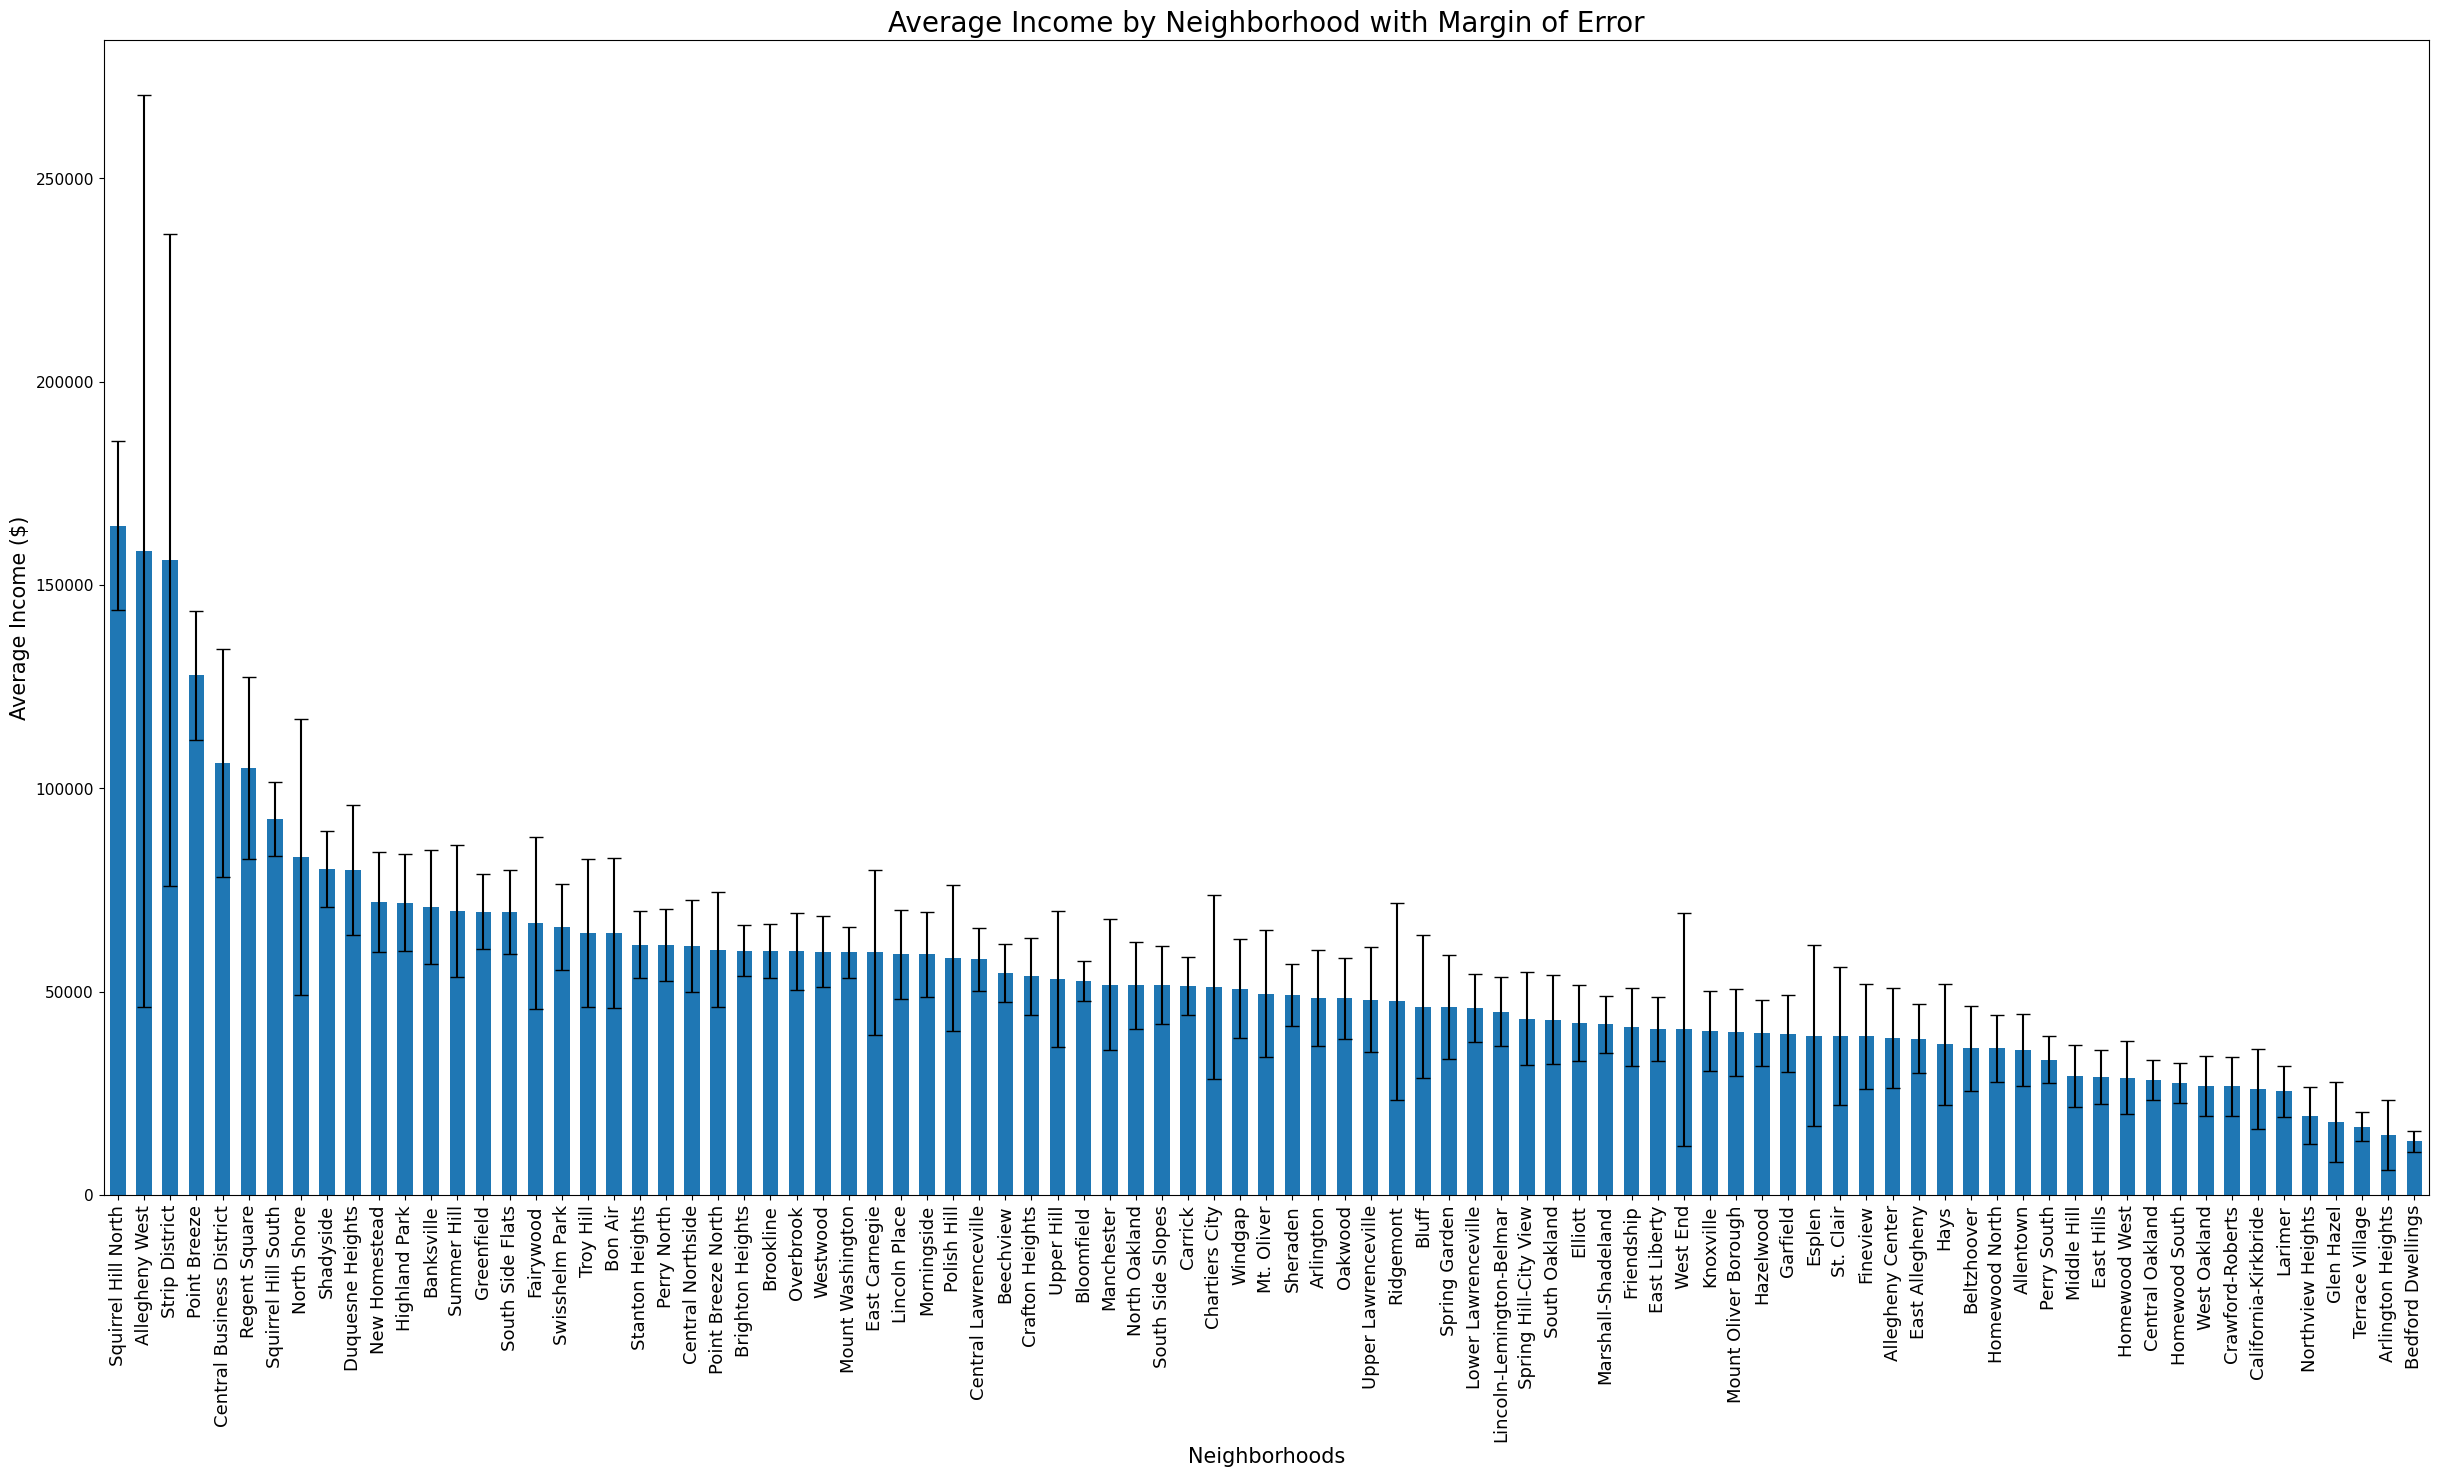

In [454]:
result['Average Income'].plot.bar(figsize=(30, 15), width=0.6, yerr=result['Margin of Error'], capsize=5)
plt.xlabel('Neighborhoods', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Average Income ($)', fontsize=15)
plt.yticks(fontsize=11)
plt.title('Average Income by Neighborhood with Margin of Error', fontsize=20)